# Downloading content from CrisisLex26
Instead of relying on manually downloading data from CrisisLexT26 this repo can help.

### Step 1 - Clone this repo
Clone this repo to retrieve required files and functions.

In [1]:
user = "Crisitunity-Lab"
repo = "ARDC-Project"

!git clone https://github.com/$user/$repo /content/repo

Cloning into '/content/repo'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 370 (delta 84), reused 86 (delta 33), pack-reused 199
Receiving objects: 100% (370/370), 1.69 MiB | 10.88 MiB/s, done.
Resolving deltas: 100% (185/185), done.


# Step 2 Install requirements
Using pip install the library requirements into the Colab Notebook

In [2]:
!pip install -r /content/repo/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 20.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=b617f1ef9b5f369a1c2c03bfb3a341dd291054dd60564582b2f3c115f4a41d3c
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


# Step 3 Import Data Utils and get data
Using the pre-built function in the data utils file, provide a link to the zipped data and a destination for the data to be unzippe too.

In [3]:
import repo.src.structure_extractor.data_utils as du

zip_file_url = "https://github.com/sajao/CrisisLex/blob/master/releases/CrisisLexT26-v1.0.zip?raw=true"
dest_folder = "/content/data/"

du.unzip_from_url(src=zip_file_url, dest=dest_folder)

Download and Unzip complete


Data is now stored at /content/data/CrisisLexT26 within the colab environment.

# Data Frame
To get the data into a dataframe - there's a function for that.

In [4]:
# Set the folder name for where the data is stored
data_folder_name = "CrisisLexT26"
data_loc = dest_folder + data_folder_name
min_tweet_length = 6

# Combine csv's into a single dataframe. By default the folder the data is stored in is included as a
# new field called "label", but this can be turned off by setting the retrieve_label parameter to False.
df = du.combine_csv_files(data_loc, min_tweet_len=min_tweet_length)

/content/repo/src/structure_extractor/data_utils.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_df["label"]=label
/content/repo/src/structure_extractor/data_utils.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_df["year"]=_get_year_of_crisis(label)
/content/repo/src/structure_extractor/data_utils.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [5]:
# Data is now in a nice dataframe
df.head(10)

,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness,label,year,country_code,crisis_type
0,203440928084602880,E #Navelli... a che punto siamo? Dov'è il pian...,Outsiders,Other Useful Information,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake
1,203843778409283584,"RT @andmarini: #Modena Strage di Brindisi, all...",Not labeled,Not labeled,Not related,2012_Italy_earthquakes,2012,IT,Earthquake
2,204030290715348993,#Terremoto ! in alto si sente parecchio,Outsiders,Sympathy and support,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake
3,204030617850089472,Inequivocabilmente questa era una scossa di #t...,Eyewitness,Sympathy and support,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake
5,204032853439283201,"“@perugini: 44.956°N, 11.241°E - 4.2 Magnitudo...",Eyewitness,Other Useful Information,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
6,204033939772407808,RT @Reuters: BREAKING NEWS: 6.3 magnitude eart...,Media,Other Useful Information,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
7,204033969124155392,RT @Reuters: BREAKING NEWS: 6.3 magnitude eart...,Media,Other Useful Information,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
9,204034510176780288,RT @Reuters: BREAKING NEWS: 6.3 magnitude eart...,Media,Other Useful Information,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
11,204034585670062080,"RT @USGSted: Strong earthquake, NORTHERN ITALY...",Media,Caution and advice,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
12,204034644398702592,Oddio #terremoto. L'ho sentito solo io alle 4...,Eyewitness,Sympathy and support,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake


In [79]:
len(df)

26001

In [10]:
from matplotlib import pyplot as plt

%matplotlib inline

In [52]:
df.label.value_counts().sort_values()

2013_Bohol_earthquake             818
2013_Sardinia_floods              878
2013_Manila_floods                899
2013_Colorado_floods              913
2013_West_Texas_explosion         921
2012_Typhoon_Pablo                924
2013_Boston_bombings              925
2012_Italy_earthquakes            930
2013_Singapore_haze               934
2012_Philipinnes_floods           944
2013_Alberta_floods               949
2013_Brazil_nightclub_fire        959
2012_Venezuela_refinery           965
2013_Lac_Megantic_train_crash     975
2013_Typhoon_Yolanda              980
2013_LA_airport_shootings         982
2013_NY_train_crash               983
2013_Spain_train_crash            989
2012_Guatemala_earthquake        1016
2013_Glasgow_helicopter_crash    1061
2013_Queensland_floods           1091
2013_Australia_bushfire          1105
2012_Colorado_wildfires          1117
2013_Savar_building_collapse     1179
2012_Costa_Rica_earthquake       1270
2013_Russia_meteor               1294
Name: label,

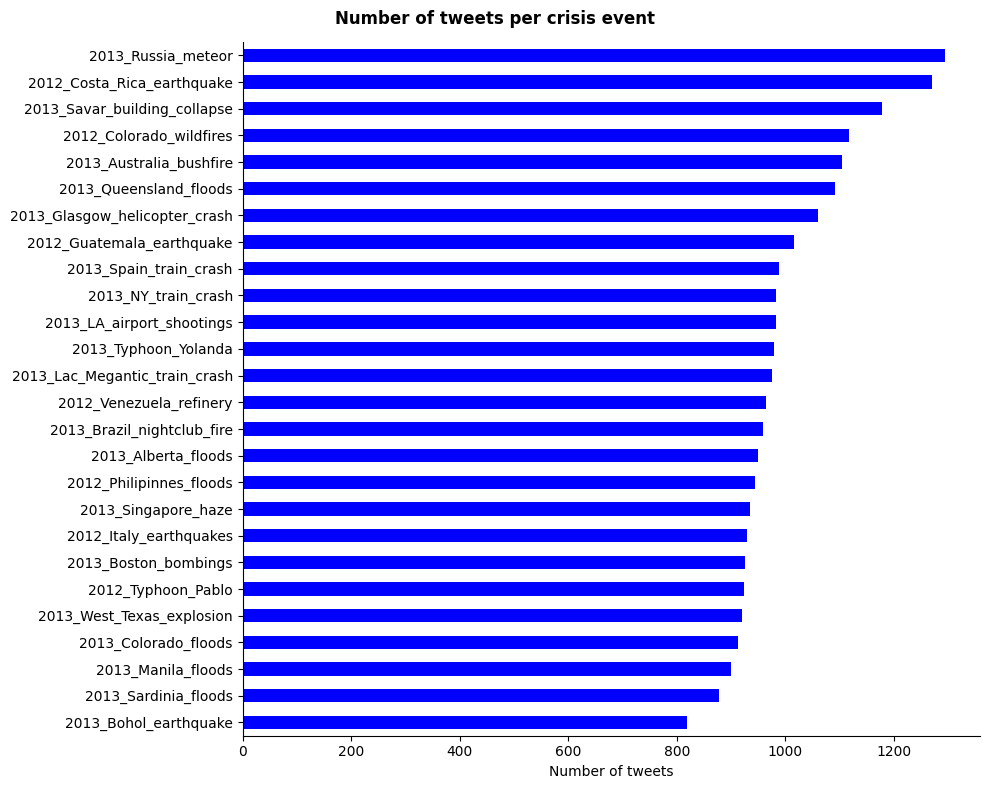

In [62]:
fig, axes = plt.subplots()

df.label.value_counts().sort_values().plot(kind='barh',
                                           figsize=(10,8),
                                           color='blue')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Number of tweets')
fig.suptitle("Number of tweets per crisis event", fontweight='bold', ha='center')

fig.tight_layout()
plt.savefig('label_chart.png')

In [53]:
df["Information Source"].value_counts().sort_values()

Not applicable     371
Business           411
NGOs               951
Government        1144
Eyewitness        2050
Not labeled       2731
Outsiders         8519
Media             9824
Name: Information Source, dtype: int64

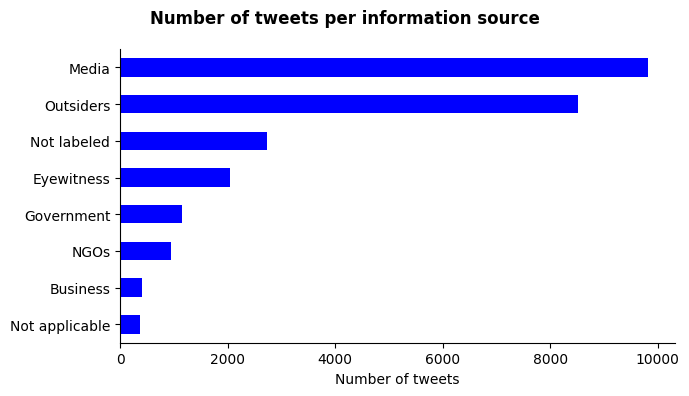

In [61]:
fig, axes = plt.subplots()

df["Information Source"].value_counts().sort_values().plot(kind='barh',
                                           figsize=(7,4),
                                           color='blue')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Number of tweets')
fig.suptitle("Number of tweets per information source", fontweight='bold', ha='center')

fig.tight_layout()
plt.savefig('information_source_chart.png')

In [63]:
df["Information Type"].value_counts().sort_values()

Not applicable                   998
Infrastructure and utilities    1547
Caution and advice              2227
Donations and volunteering      2337
Not labeled                     2805
Sympathy and support            4200
Affected individuals            4713
Other Useful Information        7174
Name: Information Type, dtype: int64

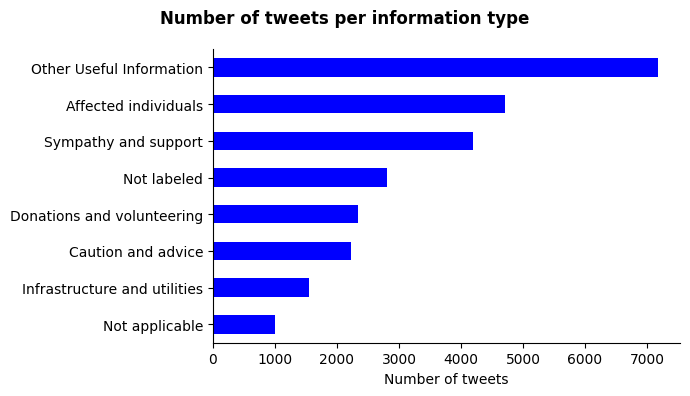

In [65]:
fig, axes = plt.subplots()

df["Information Type"].value_counts().sort_values().plot(kind='barh',
                                           figsize=(7,4),
                                           color='blue')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Number of tweets')
fig.suptitle("Number of tweets per information type", fontweight='bold', ha='center')

fig.tight_layout()
plt.savefig('information_type_chart.png')

In [66]:
df["Informativeness"].value_counts().sort_values()

Not applicable                     366
Not related                       2372
Related - but not informative     6990
Related and informative          16273
Name: Informativeness, dtype: int64

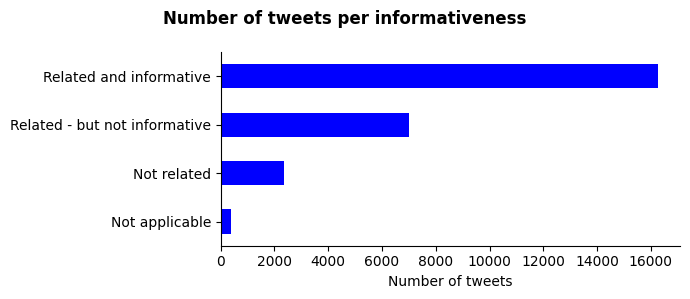

In [68]:
fig, axes = plt.subplots()

df["Informativeness"].value_counts().sort_values().plot(kind='barh',
                                           figsize=(7,3),
                                           color='blue')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Number of tweets')
fig.suptitle("Number of tweets per informativeness", fontweight='bold', ha='center')

fig.tight_layout()
plt.savefig('informativeness_chart.png')

In [70]:
df.country_code.value_counts().sort_values()

SG     934
BR     959
VE     965
ES     989
GT    1016
GB    1061
BD    1179
CR    1270
RU    1294
IT    1808
CA    1924
AU    2196
PH    4565
US    5841
Name: country_code, dtype: int64

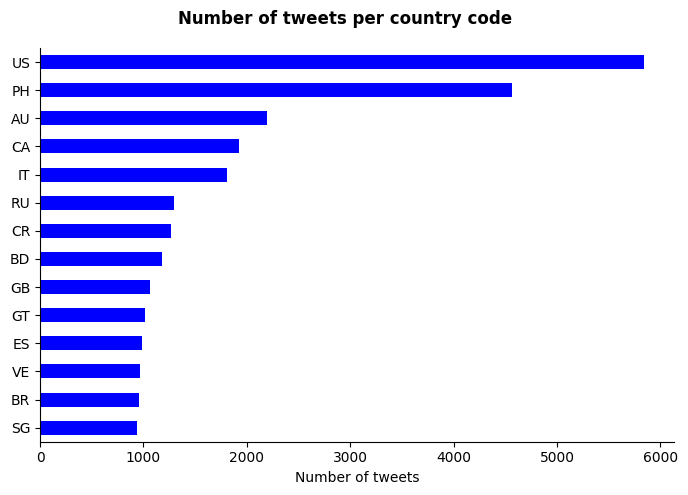

In [75]:
fig, axes = plt.subplots()

df.country_code.value_counts().sort_values().plot(kind='barh',
                                           figsize=(7,5),
                                           color='blue')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Number of tweets')
fig.suptitle("Number of tweets per country code", fontweight='bold', ha='center')

fig.tight_layout()
plt.savefig('country_chart.png')

In [73]:
df.crisis_type.value_counts().sort_values()

Haze                  934
Nightclub Fire        959
Helicopter Crash     1061
Bushfire             1105
Wildfire             1117
Building Collapse    1179
Meteor               1294
Explosion            1886
Typhoon              1904
Terrorism            1907
Train Crash          2947
Earthquake           4034
Flood                5674
Name: crisis_type, dtype: int64

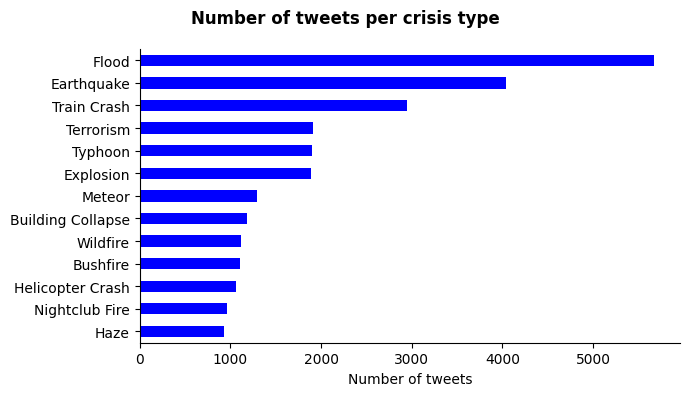

In [78]:
fig, axes = plt.subplots()

df.crisis_type.value_counts().sort_values().plot(kind='barh',
                                           figsize=(7,4),
                                           color='blue')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Number of tweets')
fig.suptitle("Number of tweets per crisis type", fontweight='bold', ha='center')

fig.tight_layout()
plt.savefig('crisis_type_chart.png')